In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from joblib import Parallel, delayed
import json
import os
import sys
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from random import choice
from time import time
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

## Primero una regresión logistica

In [5]:
df = pd.read_csv("Dataframe_Auxiliar.csv")
df = df.drop("Unnamed: 0", axis=1 )

In [6]:
df

,score_home_0,score_away_0,BallPossesion_home_0,BallPossesion_away_0,ShotsOnTarget_home_0,ShotsOnTarget_away_0,ShotsOffTarget_home_0,ShotsOffTarget_away_0,fouls_home_0,fouls_away_0,...,aerials_won_away_numerico_29,aerials_won_away_porcentaje_29,dribbles_succeeded_home_numerico_29,dribbles_succeeded_home_porcentaje_29,dribbles_succeeded_away_numerico_29,dribbles_succeeded_away_porcentaje_29,played_home_29,played_away_29,Resultado,Resultado_Numerico
0,2,1,36.0,64.0,4.0,3.0,8.0,2.0,9.0,15.0,...,18.0,44.0,9.0,47.0,12.0,63.0,0,1,W,2-0
1,1,2,41.0,59.0,3.0,6.0,4.0,3.0,11.0,9.0,...,11.0,42.0,13.0,57.0,12.0,48.0,0,1,D,0-0
2,0,0,65.0,35.0,3.0,1.0,3.0,5.0,14.0,20.0,...,9.0,43.0,14.0,64.0,9.0,60.0,0,1,W,2-1
3,1,1,73.0,27.0,8.0,2.0,5.0,1.0,7.0,9.0,...,27.0,61.0,10.0,59.0,10.0,48.0,0,1,D,1-1
4,3,0,55.0,45.0,6.0,0.0,6.0,3.0,6.0,12.0,...,33.0,65.0,7.0,39.0,6.0,60.0,1,0,W,4>-0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11896,3,2,46.0,54.0,7.0,4.0,3.0,2.0,10.0,10.0,...,11.0,48.0,10.0,53.0,2.0,22.0,1,0,W,3-2
11897,1,3,62.0,38.0,7.0,6.0,6.0,6.0,10.0,11.0,...,5.0,83.0,22.0,71.0,6.0,38.0,1,0,W,2-1
11898,2,1,64.0,36.0,4.0,5.0,3.0,3.0,13.0,16.0,...,15.0,39.0,4.0,22.0,8.0,38.0,1,0,W,3-1
11899,4,2,45.0,55.0,9.0,3.0,3.0,8.0,18.0,6.0,...,15.0,39.0,4.0,22.0,8.0,38.0,0,1,W,3-1


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Suponiendo que tienes un DataFrame llamado df con tus datos y el resultado en la columna "Resultado"
# Asegúrate de que tus características (features) están en columnas separadas

# Dividir los datos en características (features) y etiquetas (labels)
X = df.drop(["Resultado","Resultado_Numerico"],axis =1)

y = df["Resultado"]  # etiquetas
# y = df["Resultado_Numerico"]  # etiquetas

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configurar y entrenar el modelo de regresión logística
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 100)
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión (accuracy) del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.4724905501889962


c:\Users\gfuen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


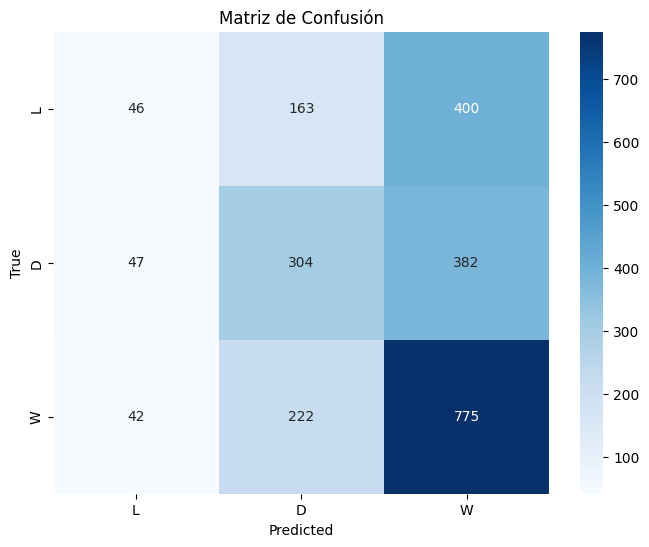

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["L", "D", "W"], yticklabels=["L", "D", "W"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Matriz de Confusión')
plt.show()

In [9]:
coefficients = model.coef_
# Calcular el valor absoluto de los coeficientes
abs_coefficients = np.abs(coefficients)

# Obtener los nombres de las características (features)
feature_names = X.columns

# Crear un diccionario que mapee los nombres de las características a sus coeficientes absolutos
feature_coefficients = dict(zip(feature_names, abs_coefficients.flatten()))

# Ordenar el diccionario por valores de coeficientes absolutos en orden descendente
sorted_features = sorted(feature_coefficients.items(), key=lambda x: x[1], reverse=True)

# Imprimir los coeficientes más significativos
print("Coeficientes más significativos:")
for feature, coef in sorted_features:
    print(f"{feature}: {coef}")

Coeficientes más significativos:
own_half_passes_away_21: 0.001119298907915776
opposition_half_passes_away_2: 0.0010944961245066159
opposition_half_passes_away_18: 0.0010212194775730335
own_half_passes_away_27: 0.000850180997973095
own_half_passes_away_29: 0.0008312271669276578
own_half_passes_home_18: 0.0008297791656837494
own_half_passes_home_16: 0.0008270438882522195
tackles_succeeded_home_porcentaje_0: 0.0008187693169841943
opposition_half_passes_away_12: 0.0007977548091806215
dribbles_succeeded_away_porcentaje_11: 0.0007441980552384199
opposition_half_passes_away_28: 0.0007364768616546177
opposition_half_passes_home_14: 0.0007355404592231207
own_half_passes_away_13: 0.0006952109040647484
own_half_passes_away_26: 0.0006951175332560912
own_half_passes_away_10: 0.000673022312520939
passes_away_19: 0.0006660592727235312
long_balls_accurate_home_porcentaje_6: 0.0006634693355984281
dribbles_succeeded_away_porcentaje_18: 0.0006535783140817942
opposition_half_passes_home_24: 0.00064843607

In [10]:
df_f = pd.read_csv("Media_Movil.csv")
df_f = df_f.drop("Unnamed: 0", axis=1 )

In [11]:
df_f

,MediaMovil_3_score__h_1,MediaMovil_3_score__h_2,MediaMovil_3_score__a_1,MediaMovil_3_score__a_2,MediaMovil_6_score__h_1,MediaMovil_6_score__h_2,MediaMovil_6_score__a_1,MediaMovil_6_score__a_2,MediaMovil_9_score__h_1,MediaMovil_9_score__h_2,...,MediaMovil_12_dribbles_succeeded__porcentaje_h_1,MediaMovil_12_dribbles_succeeded__porcentaje_h_2,MediaMovil_12_dribbles_succeeded__porcentaje_a_1,MediaMovil_12_dribbles_succeeded__porcentaje_a_2,MediaMovil_15_dribbles_succeeded__porcentaje_h_1,MediaMovil_15_dribbles_succeeded__porcentaje_h_2,MediaMovil_15_dribbles_succeeded__porcentaje_a_1,MediaMovil_15_dribbles_succeeded__porcentaje_a_2,Resultado,Resultado_Numerico
0,0.000000,0.666667,0.666667,0.000000,0.500000,0.333333,0.333333,0.500000,0.444444,0.000000,...,3.250000,3.500000,3.500000,3.250000,2.733333,2.666667,2.666667,2.733333,D,1-1
1,0.333333,0.333333,0.333333,0.333333,0.000000,0.333333,0.333333,0.000000,0.333333,0.222222,...,4.583333,4.666667,4.666667,4.583333,2.600000,2.800000,2.800000,2.600000,L,0-4>
2,0.000000,0.000000,0.000000,0.000000,0.333333,0.833333,0.833333,0.333333,0.111111,0.111111,...,6.250000,4.166667,4.166667,6.250000,4.600000,4.200000,4.200000,4.600000,L,1-3
3,0.666667,1.000000,1.000000,0.666667,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,...,4.500000,4.666667,4.666667,4.500000,3.533333,2.600000,2.600000,3.533333,L,2-3
4,0.000000,2.333333,2.333333,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,0.222222,...,3.500000,4.583333,4.583333,3.500000,3.533333,3.600000,3.600000,3.533333,W,3-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75014,0.333333,0.333333,0.333333,0.333333,0.166667,0.000000,0.000000,0.166667,0.111111,0.111111,...,3.916667,2.750000,2.750000,3.916667,4.200000,5.000000,5.000000,4.200000,L,0-1
75015,0.333333,0.666667,0.666667,0.333333,0.500000,0.333333,0.333333,0.500000,0.000000,0.333333,...,3.666667,4.416667,4.416667,3.666667,3.466667,2.200000,2.200000,3.466667,W,2-0
75016,0.666667,0.000000,0.000000,0.666667,0.166667,0.000000,0.000000,0.166667,0.111111,0.111111,...,4.750000,3.333333,3.333333,4.750000,3.000000,3.000000,3.000000,3.000000,W,3-1
75017,0.666667,0.333333,0.333333,0.666667,0.000000,0.166667,0.166667,0.000000,0.111111,0.111111,...,2.583333,3.333333,3.333333,2.583333,3.333333,3.133333,3.133333,3.333333,D,3-3


In [12]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Codificación de etiquetas
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(df_f["Resultado"])
# Y = label_encoder.fit_transform(df_f["Resultado_Numerico"])

# One-Hot Encoding
onehot_encoder = OneHotEncoder(sparse=False)
Y = onehot_encoder.fit_transform(Y.reshape(-1, 1))
Y = np.asarray(Y).astype('float32')

X = df_f.drop(["Resultado","Resultado_Numerico"],axis =1)
X = np.asarray(X).astype('float32')
scaler = StandardScaler()
X = scaler.fit_transform(X)
# División de datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)


c:\Users\gfuen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


drop = 0.0
size_layer = 2 ^ 5
batch_size = 2 ^ 6
epoch = 10
model = Sequential([
    Dense(size_layer, activation='relu',
          input_shape=(X.shape[1],), use_bias=True,),
    Dense(Y.shape[1], activation='softmax', use_bias=True,)
])
# # Compilamos el modelo
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.1, nesterov=True)
adam = tf.keras.optimizers.Adam(
    learning_rate=0.001, beta_1=0.99, beta_2=0.9999)

hinge = tf.keras.losses.CategoricalHinge()
focal_cross = tf.keras.losses.CategoricalFocalCrossentropy(
    alpha=0.2, gamma=2, from_logits=False, label_smoothing=0.0)
cross = tf.keras.losses.CategoricalCrossentropy(
    from_logits=False, label_smoothing=0.0)

model.compile(loss=cross,
              optimizer=adam, metrics=['categorical_accuracy',])

# # Entrenamos el modelo
history = model.fit(X_train, y_train, verbose=1, epochs=epoch, batch_size=batch_size,
                    validation_data=(X_test, y_test))

Epoch 1/10
15004/15004 [==============================] - 11s 703us/step - loss: 1.0746 - categorical_accuracy: 0.4455 - val_loss: 1.0607 - val_categorical_accuracy: 0.4487
Epoch 2/10
15004/15004 [==============================] - 10s 695us/step - loss: 1.0553 - categorical_accuracy: 0.4537 - val_loss: 1.0588 - val_categorical_accuracy: 0.4514
Epoch 3/10
15004/15004 [==============================] - 10s 697us/step - loss: 1.0547 - categorical_accuracy: 0.4545 - val_loss: 1.0734 - val_categorical_accuracy: 0.4495
Epoch 4/10
15004/15004 [==============================] - 11s 702us/step - loss: 1.0555 - categorical_accuracy: 0.4539 - val_loss: 1.0637 - val_categorical_accuracy: 0.4487
Epoch 5/10
15004/15004 [==============================] - 11s 706us/step - loss: 1.0542 - categorical_accuracy: 0.4548 - val_loss: 1.0632 - val_categorical_accuracy: 0.4507
Epoch 6/10
15004/15004 [==============================] - 11s 703us/step - loss: 1.0541 - categorical_accuracy: 0.4554 - val_loss: 1.06

1876/1876 [==============================] - 1s 468us/step


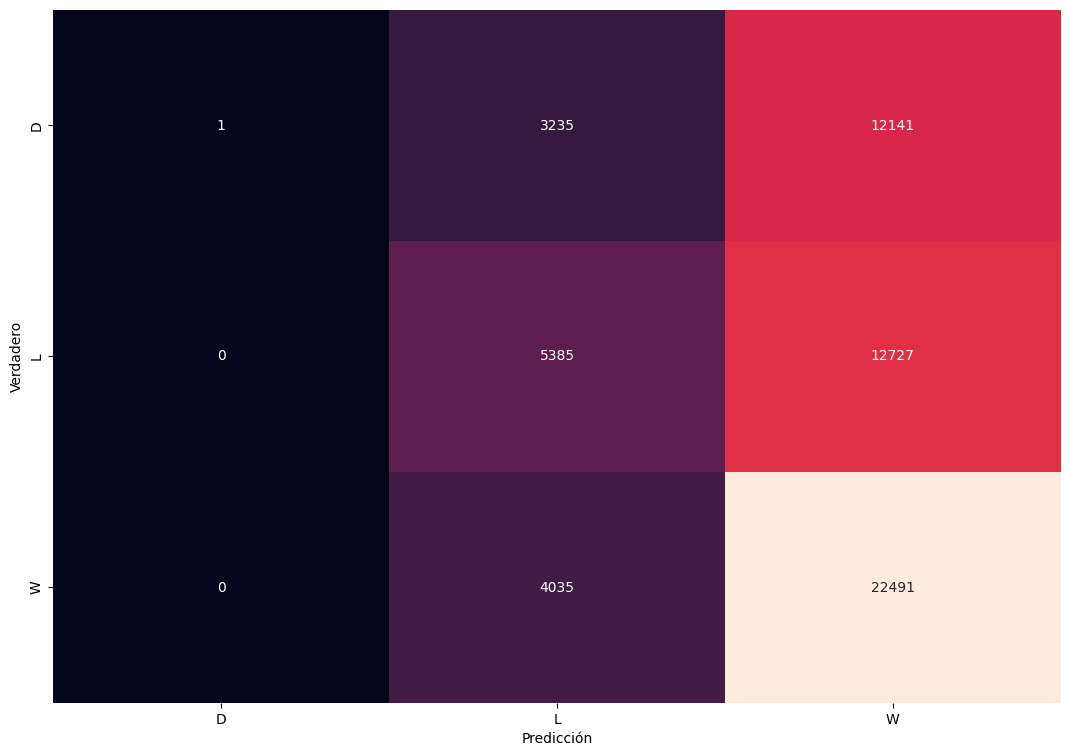

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])


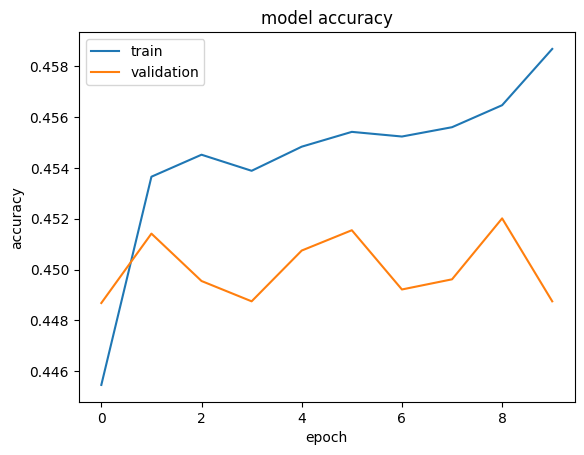

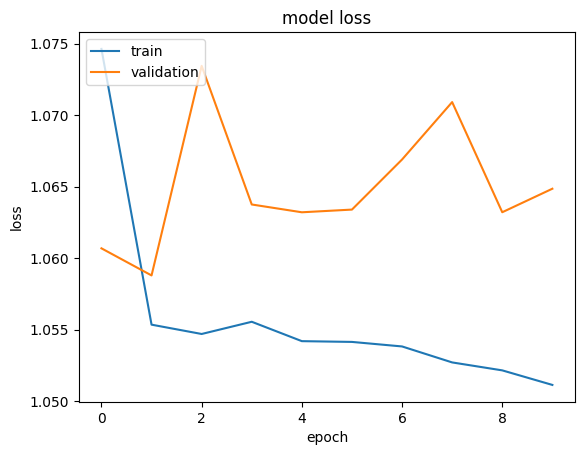

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns
from copy import deepcopy

y_prob = model.predict(X_train)
y_test_metrics = np.argmax(y_train, axis=1)
y_pred = np.argmax(y_prob, axis=1)

y_pred_copy = deepcopy(y_pred)
y_test_metrics_copy = deepcopy(y_test_metrics)


###########################################################################################################
# SOLO SI ES RESULTADO NUMERICO
# orden_bonito_max5 = np.array([18, 21, 22, 24, 27, 31, 14, 17, 23, 25, 28, 32, 13, 12, 19,
#                               26, 29, 33, 11, 10, 9, 16, 30, 34, 8, 7, 6, 5, 20, 35, 4, 3, 2, 1, 0, 15])
# orden_bonito_max4 = np.array(
#     [12, 15, 16, 18, 21, 9, 11, 17, 19, 22, 8, 7, 13, 20, 23, 6, 5, 4,10, 24, 3, 2, 1, 0, 14])
# orden_bonito = orden_bonito_max4

# label = [0 for i in range(len(orden_bonito))]
# for i in range(len(label_encoder.classes_)):
#     label[orden_bonito[i]] = label_encoder.classes_[i]
#     y_pred[y_pred_copy == i] = orden_bonito[i]
#     y_test_metrics[y_test_metrics_copy == i] = orden_bonito[i]

# label = np.array(label)
###########################################################################################################
# RESULTADO GENERAL
label =label_encoder.classes_
###########################################################################################################
# Matriz de confusión
conf_matrix = confusion_matrix(y_test_metrics, y_pred)
plt.figure(figsize=(13, 9))

sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False,
            xticklabels=label, yticklabels=label)
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [15]:
print(classification_report(y_test_metrics, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00     15377
           1       0.43      0.30      0.35     18112
           2       0.47      0.85      0.61     26526

    accuracy                           0.46     60015
   macro avg       0.63      0.38      0.32     60015
weighted avg       0.59      0.46      0.37     60015



## Lo siguiente va solo si se hizo el resultado numérico

In [11]:
y_test_metrics_simplificado = []
y_pred_simplificado = []
for i in range(len(y_test_metrics)):
    if y_test_metrics[i] <= 9:
        y_test_metrics_simplificado.append(0)
    elif y_test_metrics[i] <= 14:
        y_test_metrics_simplificado.append(1)
    else:
        y_test_metrics_simplificado.append(2)
        
for i in range(len(y_pred)):
    if y_pred[i] <= 9:
        y_pred_simplificado.append(0)
    elif y_pred[i] <= 14:
        y_pred_simplificado.append(1)
    else:
        y_pred_simplificado.append(2)

        

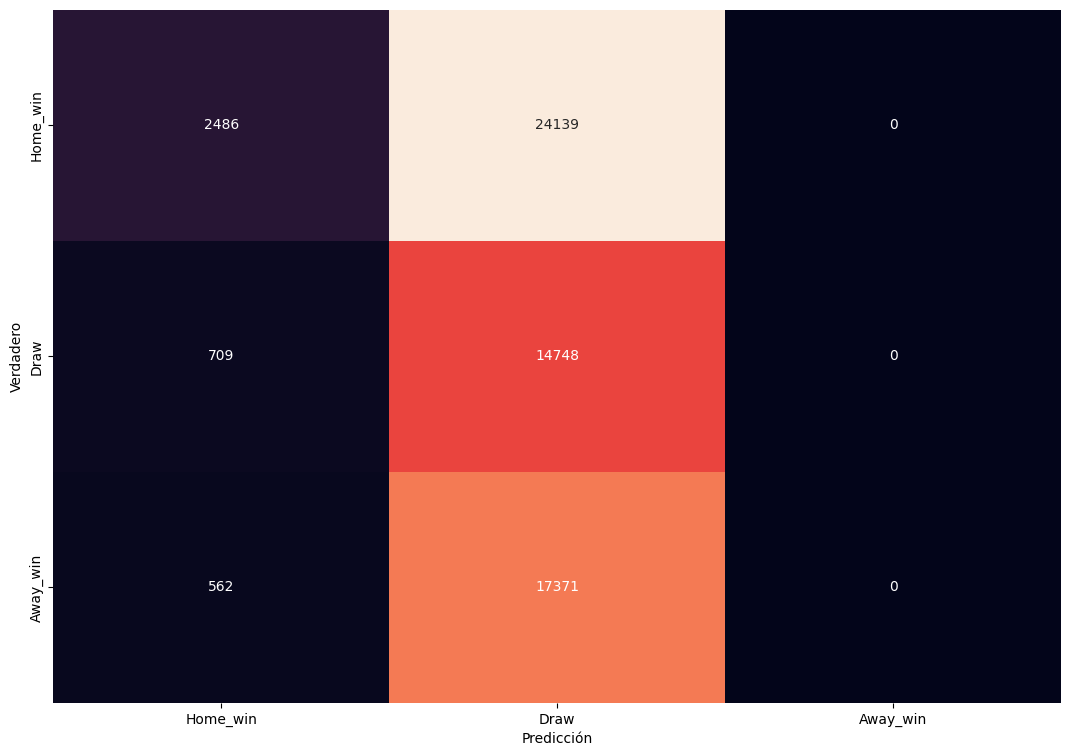

In [12]:
conf_matrix = confusion_matrix(y_test_metrics_simplificado, y_pred_simplificado)
label = ["Home_win","Draw","Away_win"]
plt.figure(figsize=(13, 9))

sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, xticklabels=label, yticklabels=label)
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

In [13]:
print(classification_report(y_test_metrics_simplificado, y_pred_simplificado))

              precision    recall  f1-score   support

           0       0.66      0.09      0.16     26625
           1       0.26      0.95      0.41     15457
           2       0.00      0.00      0.00     17933

    accuracy                           0.29     60015
   macro avg       0.31      0.35      0.19     60015
weighted avg       0.36      0.29      0.18     60015



c:\Users\gfuen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gfuen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gfuen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [14]:
y_prob_suma = []
for i in range(len(y_prob)):
    aux = [0, 0, 0]
    for j in range(len(orden_bonito)):
        if orden_bonito[j] <=9:
            aux[0] += y_prob[i][j]
        elif orden_bonito[j] <=14:
            aux[1] += y_prob[i][j]
        else:
            aux[2] += y_prob[i][j]
    y_prob_suma.append(aux)
y_prob_suma = np.array(y_prob_suma) 
y_pred_suma = np.argmax(y_prob_suma, axis=1)

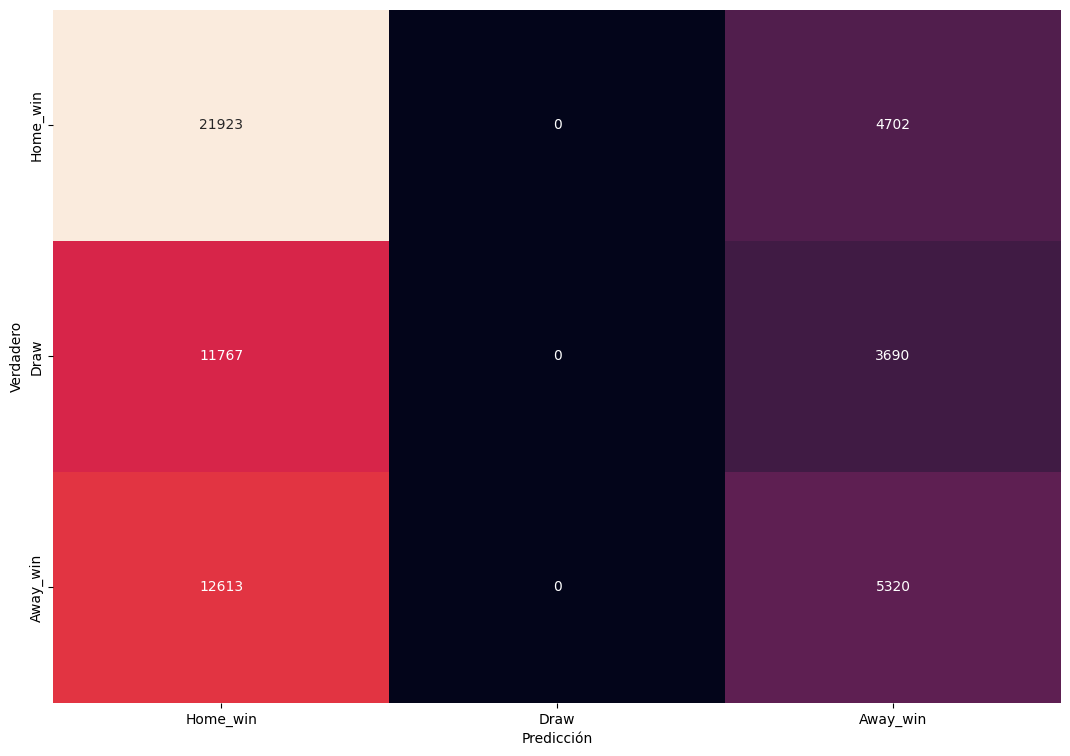

In [15]:
conf_matrix = confusion_matrix(y_test_metrics_simplificado, y_pred_suma)
label = ["Home_win","Draw","Away_win"]
plt.figure(figsize=(13, 9))

sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False, xticklabels=label, yticklabels=label)
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

In [16]:
print(classification_report(y_test_metrics_simplificado, y_pred_suma))

              precision    recall  f1-score   support

           0       0.47      0.82      0.60     26625
           1       0.00      0.00      0.00     15457
           2       0.39      0.30      0.34     17933

    accuracy                           0.45     60015
   macro avg       0.29      0.37      0.31     60015
weighted avg       0.33      0.45      0.37     60015



c:\Users\gfuen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gfuen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gfuen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [50]:
# Importamos librerías necesarias
import pandas as pd
from catboost import CatBoostClassifier, Pool

# Cargamos el dataset (reemplazar 'data.csv' con su archivo)
data = pd.read_csv("Media_Movil.csv")
data = data.drop("Unnamed: 0", axis=1 )
data = data.drop("Resultado",axis=1)

categorical_cols = data.select_dtypes(include="object").columns
if len(categorical_cols) > 0:  # Check if any categorical features exist
    cat_features = list(categorical_cols)
else:
    cat_features = None  # No categorical features, set to None


# Separamos las características (X) de la clase (y)
X = data.drop(["Resultado_Numerico"], axis=1)
y = data["Resultado_Numerico"]

# Dividimos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Creamos Pool para CatBoost (maneja datos categóricos)
train_pool = Pool(
    data=X_train, label=y_train
)
test_pool = Pool(X_test, label=y_test)

# Definimos el modelo CatBoost
model = CatBoostClassifier(
    iterations=500, learning_rate=0.03, loss_function="CrossEntropy", silent=True
)

# Entrenamos el modelo
model.fit(train_pool)

# Realizamos predicciones
predictions = model.predict(test_pool)

# Evaluamos el rendimiento (por ejemplo, F1-score)
from sklearn.metrics import f1_score

f1 = f1_score(y_test, predictions, average="weighted")
print("F1-score:", f1)


F1-score: 0.04465517929137527


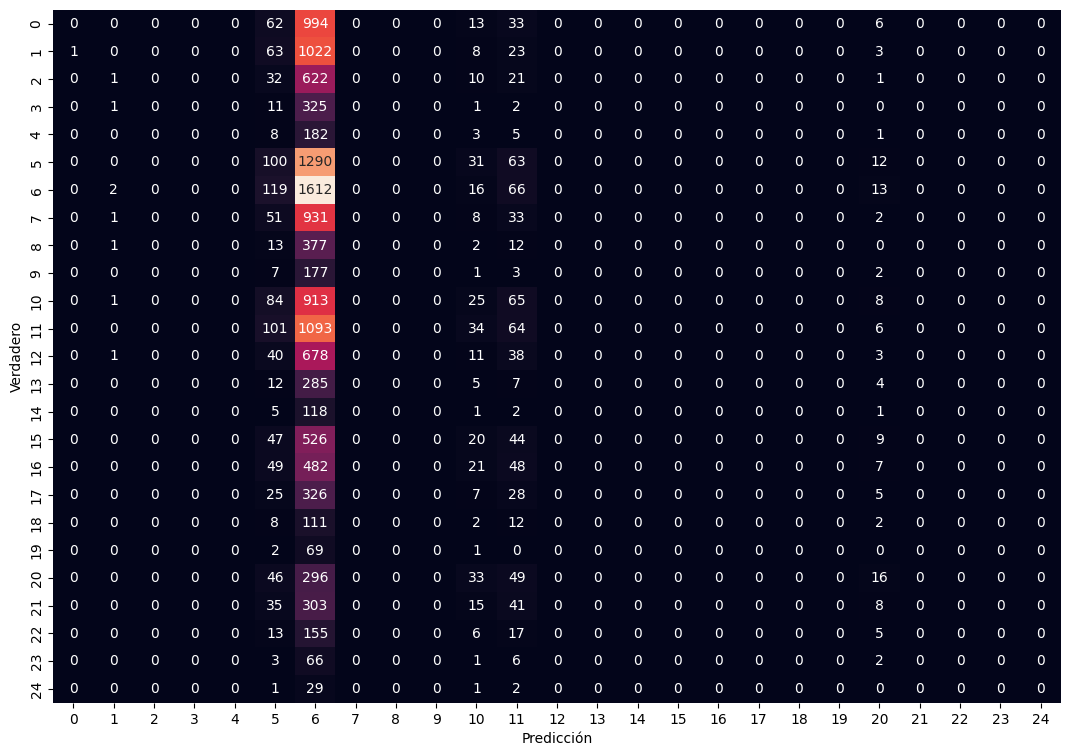

In [55]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(13, 9))

sns.heatmap(conf_matrix, annot=True, fmt='d', cbar=False)

plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0-0       0.00      0.00      0.00      1108
         0-1       0.00      0.00      0.00      1120
         0-2       0.00      0.00      0.00       687
         0-3       0.00      0.00      0.00       340
        0-4>       0.00      0.00      0.00       199
         1-0       0.11      0.07      0.08      1496
         1-1       0.12      0.88      0.22      1828
         1-2       0.00      0.00      0.00      1026
         1-3       0.00      0.00      0.00       405
        1-4>       0.00      0.00      0.00       190
         2-0       0.09      0.02      0.04      1096
         2-1       0.09      0.05      0.06      1298
         2-2       0.00      0.00      0.00       771
         2-3       0.00      0.00      0.00       313
        2-4>       0.00      0.00      0.00       127
         3-0       0.00      0.00      0.00       646
         3-1       0.00      0.00      0.00       607
         3-2       0.00    

c:\Users\gfuen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gfuen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\gfuen\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,